In [1]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import LFR_benchmark_graph
from community import community_louvain
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import asyn_lpa_communities
from networkx.algorithms.community import greedy_modularity_communities
import pandas as pd
from IPython.display import display, HTML, display_pretty
import os
%matplotlib inline

In [12]:
# Louvain's community detection method
def detect_communities_louvain(G):
    partition = community_louvain.best_partition(G)
    communities = list()
    for com in set(partition.values()) :
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        communities.append(sorted(list_nodes))
    return sorted(communities)

# mod
def greedy_modularity_communities(G):
    communities = community.greedy_modularity_communities(G)
    print(communities)
    return sorted(map(sorted, communities))

# Girvan Newman's community detection method
def detect_communities_girvan_newman(G):
    communities = community.girvan_newman(G)
    return sorted(sorted(c) for c in next(communities))

# Fast Greedy community detection method
def detect_communities_greedy(G):
    communities = greedy_modularity_communities(G)
    return sorted(map(sorted, communities))

# Label propagation community detection method
def detect_communities_label_propagation(G):
    communities = list()
    #for c in asyn_lpa_communities(G):
    for c in label_propagation_communities(G):
        communities.append(sorted(c))
    return sorted(communities)


Function to plot communities

In [13]:
# Plot graph with communities, receives a list of communities, where each community is a list of nodes (ints)
def show_communities(G, communities, name='title'):
    pos=nx.spring_layout(G)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure()
    plt.title(name, fontsize=20)
    aux = 0
    for community in communities:
        nx.draw_networkx_nodes(G, pos, community, node_size = 50, node_color = colors[aux])
        aux = aux + 1
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show(block=True)

/home/user/msTest/venv_jupyterhab/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


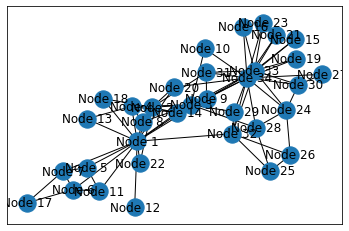

In [4]:
G = nx.read_gml(path = 'karate.gml')
nx.draw_networkx(G)

In [5]:
# take only giant connected component for the further analysis: 
G = max(nx.connected_component_subgraphs(G), key=len)
print("Number of nodes -", len(G.nodes()))
print("Number of edges -", len(G.edges()))

Number of nodes - 34
Number of edges - 78


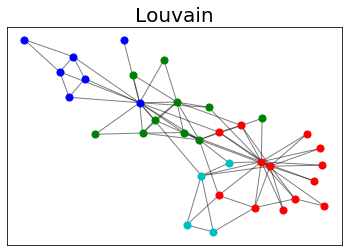

In [14]:
methodNames = [
    'Louvain',
    'Girvan Newman',
    'Fast Greedy',
    'Label Propagation',
]

methods = [
    detect_communities_louvain,
    detect_communities_girvan_newman,
    detect_communities_greedy,
    detect_communities_label_propagation,
]

#for i in range(len(methods)):
result = detect_communities_louvain(G)
show_communities(G, result, name="Louvain")

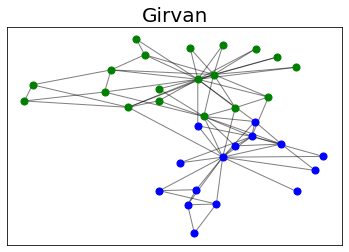

In [15]:
#for i in range(len(methods)):
result = detect_communities_girvan_newman(G)
show_communities(G, result, name="Girvan")

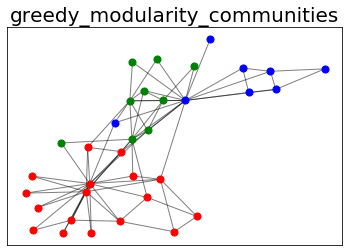

In [26]:
def greedy_modularity_communities(G):
    communities = community.greedy_modularity_communities(G)
    return sorted(map(sorted, communities))

result = greedy_modularity_communities(G)
show_communities(G, result, name="greedy_modularity_communities")

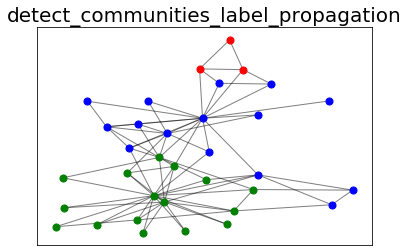

In [21]:
def detect_communities_label_propagation(G):
    communities = list()
    #for c in asyn_lpa_communities(G):
    for c in label_propagation_communities(G):
        communities.append(sorted(c))
    return sorted(communities)
result = detect_communities_label_propagation(G)
show_communities(G, result, name="detect_communities_label_propagation")